# Preparing the data

## Reading csv files

In [1]:
import pandas as pd

# Load all CSV files
files = {
    "whdbpso": "/kaggle/input/standard/whdbpso.csv",
    "bpso_hdbpso": "/kaggle/input/standard/bpso_hdbpso.csv",
    "stochastic_bpso_hdbpso": "/kaggle/input/stochastic/stochastic_bpso_hdbpso.csv",
    "stochastic_whdpbso": "/kaggle/input/stochastic/stochastic_whdbpso.csv"
}

dfs = {name: pd.read_csv(path) for name, path in files.items()}

# Combine all into one DataFrame
df = pd.concat(dfs.values(), ignore_index=True)

# Preview combined DataFrame
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,filename,m,n,k,initial_fitness,fitness,iteration,execution_time(s),num_particles,neighborhood_size,inertia_type,inertia_value,c1,c2,dist_type,selection_type
0,scpc5.txt,4000,400,200,396,399,100,5.252666,10,NaN,linear,NaN,1.5,1.5,wHD,standard
1,scpc5.txt,4000,400,200,396,400,157,8.859581,10,NaN,linear,NaN,1.5,1.5,wHD,standard
2,scpc5.txt,4000,400,200,398,399,100,6.301083,10,NaN,linear,NaN,1.5,2.0,wHD,standard
3,scpc5.txt,4000,400,200,398,399,300,18.763428,10,NaN,linear,NaN,1.5,2.0,wHD,standard
4,scpc5.txt,4000,400,200,398,399,500,31.350713,10,NaN,linear,NaN,1.5,2.0,wHD,standard


## Preprocessing

### Creating the coverage rate column

In [2]:
# Drop rows where 'n' is 0 or NaN to avoid division issues: Just in case but it should remain the same because n is the number of elements
df = df[df["n"].notna() & (df["n"] != 0)]

df["coverage_rate"] = df["fitness"] / df["n"] * 100

df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,filename,m,n,k,initial_fitness,fitness,iteration,execution_time(s),num_particles,neighborhood_size,inertia_type,inertia_value,c1,c2,dist_type,selection_type,coverage_rate
0,scpc5.txt,4000,400,200,396,399,100,5.252666,10,NaN,linear,NaN,1.5,1.5,wHD,standard,99.75
1,scpc5.txt,4000,400,200,396,400,157,8.859581,10,NaN,linear,NaN,1.5,1.5,wHD,standard,100.00
2,scpc5.txt,4000,400,200,398,399,100,6.301083,10,NaN,linear,NaN,1.5,2.0,wHD,standard,99.75
3,scpc5.txt,4000,400,200,398,399,300,18.763428,10,NaN,linear,NaN,1.5,2.0,wHD,standard,99.75
4,scpc5.txt,4000,400,200,398,399,500,31.350713,10,NaN,linear,NaN,1.5,2.0,wHD,standard,99.75


### Creating the file class column

In [3]:
# Create the 'filename_class' column based on the 'filename'
def classify_filename(filename):
    if filename.startswith('scp4'):
        return '4'
    elif filename.startswith('scpa'):
        return 'A'
    elif filename.startswith('scpb'):
        return 'B'
    elif filename.startswith('scpc'):
        return 'C'
    else:
        return 'other'

df['file_class'] = df['filename'].apply(classify_filename)
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,filename,m,n,k,initial_fitness,fitness,iteration,execution_time(s),num_particles,neighborhood_size,inertia_type,inertia_value,c1,c2,dist_type,selection_type,coverage_rate,file_class
0,scpc5.txt,4000,400,200,396,399,100,5.252666,10,NaN,linear,NaN,1.5,1.5,wHD,standard,99.75,C
1,scpc5.txt,4000,400,200,396,400,157,8.859581,10,NaN,linear,NaN,1.5,1.5,wHD,standard,100.00,C
2,scpc5.txt,4000,400,200,398,399,100,6.301083,10,NaN,linear,NaN,1.5,2.0,wHD,standard,99.75,C
3,scpc5.txt,4000,400,200,398,399,300,18.763428,10,NaN,linear,NaN,1.5,2.0,wHD,standard,99.75,C
4,scpc5.txt,4000,400,200,398,399,500,31.350713,10,NaN,linear,NaN,1.5,2.0,wHD,standard,99.75,C


### Replacing neighborhood size = NaN with 'global' or df['num_particles']

In [4]:
# First : Let's try global
df.loc[df['neighborhood_size'] > df['num_particles'], 'neighborhood_size'] = 'global'
df['neighborhood_size'] = df['neighborhood_size'].fillna("global")

# The second option if needeed:
# df['neighborhood_size'] = df['neighborhood_size'].fillna(df['num_particles'])

df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
<ipython-input-4-ff9c7e991527>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'global' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['neighborhood_size'] > df['num_particles'], 'neighborhood_size'] = 'global'
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in grea

,filename,m,n,k,initial_fitness,fitness,iteration,execution_time(s),num_particles,neighborhood_size,inertia_type,inertia_value,c1,c2,dist_type,selection_type,coverage_rate,file_class
0,scpc5.txt,4000,400,200,396,399,100,5.252666,10,global,linear,NaN,1.5,1.5,wHD,standard,99.75,C
1,scpc5.txt,4000,400,200,396,400,157,8.859581,10,global,linear,NaN,1.5,1.5,wHD,standard,100.00,C
2,scpc5.txt,4000,400,200,398,399,100,6.301083,10,global,linear,NaN,1.5,2.0,wHD,standard,99.75,C
3,scpc5.txt,4000,400,200,398,399,300,18.763428,10,global,linear,NaN,1.5,2.0,wHD,standard,99.75,C
4,scpc5.txt,4000,400,200,398,399,500,31.350713,10,global,linear,NaN,1.5,2.0,wHD,standard,99.75,C


In [5]:
df.shape

(86365, 18)

### Iteration manipulation

To correct missing iteration values caused by early stopping in PSO, we generate rows for missing target iterations (100, 300, 500, 700, 1000) while keeping the performance metrics (e.g., fitness, coverage rate, execution time) unchanged.

The process:
- Get the maximum iteration value for each parameter configuration.
- Create new rows for target iterations greater than the maximum iteration.
- Merge the original rows with the new synthetic rows to fill the gaps.

In [6]:
target_iterations = [100, 300, 500, 700, 1000]

# Fill missing values if needed
df['neighborhood_size'] = df['neighborhood_size'].fillna('global')
df['inertia_value'] = df['inertia_value'].fillna('None')

# Make sure 'iteration' is integer
df['iteration'] = df['iteration'].astype(int)

# Columns that define a unique PSO config
param_cols = [
    'filename', 'm', 'n', 'k',
    'num_particles', 'neighborhood_size',
    'inertia_type', 'inertia_value', 'c1', 'c2',
    'dist_type', 'selection_type'
]

# Get rows with max iteration per group
max_iter_rows = df.loc[df.groupby(param_cols)['iteration'].idxmax()].copy()

# Generate synthetic rows for iterations > max
new_rows = []

for _, row in max_iter_rows.iterrows():
    current_iter = row['iteration']
    missing_iters = [i for i in target_iterations if i > current_iter]
    
    for it in missing_iters:
        new_row = row.copy()
        new_row['iteration'] = it
        new_rows.append(new_row)

# Create DataFrame from generated rows
df_generated = pd.DataFrame(new_rows)

# Filter original df to keep only rows with iterations in target set
df_filtered = df[df['iteration'].isin(target_iterations)].copy()

# Concatenate filtered original + generated synthetic rows
df = pd.concat([df_filtered, df_generated], ignore_index=True)

# Parameter selection

## Selecting selection_type


### Average coverage rate

In [7]:
avg_cr = df.groupby(['file_class', 'selection_type'])['coverage_rate'].mean().reset_index()

avg_cr

,file_class,selection_type,coverage_rate
0,4,standard,75.449583
1,4,stochastic,75.434306
2,A,standard,99.208466
3,A,stochastic,99.208789
4,B,standard,100.000000
5,B,stochastic,100.000000
6,C,standard,99.986005
7,C,stochastic,99.985198


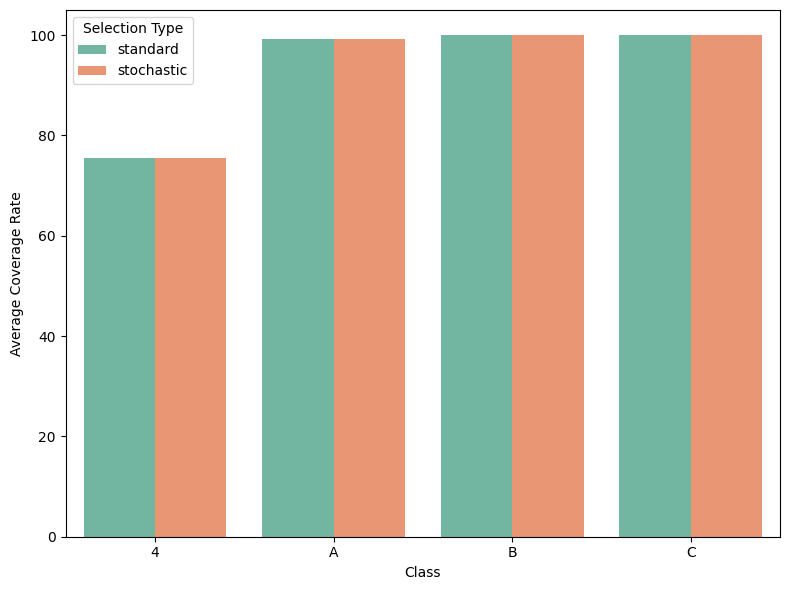

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(
    data=avg_cr,
    x='file_class',
    y='coverage_rate',
    hue='selection_type',
    palette='Set2'
)

# plt.title("Average Coverage Rate per Class")
plt.xlabel("Class")
plt.ylabel("Average Coverage Rate")
plt.legend(title="Selection Type")
plt.tight_layout()
plt.savefig("parameter:selection_type_avg_cr.png")
plt.show()

### Incorporating time

In [9]:
avg_cr_adjusted = df.groupby(['file_class', 'selection_type']).apply(
    lambda group: group['coverage_rate'].mean() / group['execution_time(s)'].mean()
).reset_index(name='adjusted_coverage_rate')

avg_cr_adjusted

<ipython-input-9-198f1d88365c>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_cr_adjusted = df.groupby(['file_class', 'selection_type']).apply(


,file_class,selection_type,adjusted_coverage_rate
0,4,standard,1.749832
1,4,stochastic,3.697686
2,A,standard,0.792530
3,A,stochastic,2.232171
4,B,standard,404.638397
5,B,stochastic,1247.737485
6,C,standard,12.203447
7,C,stochastic,23.365811


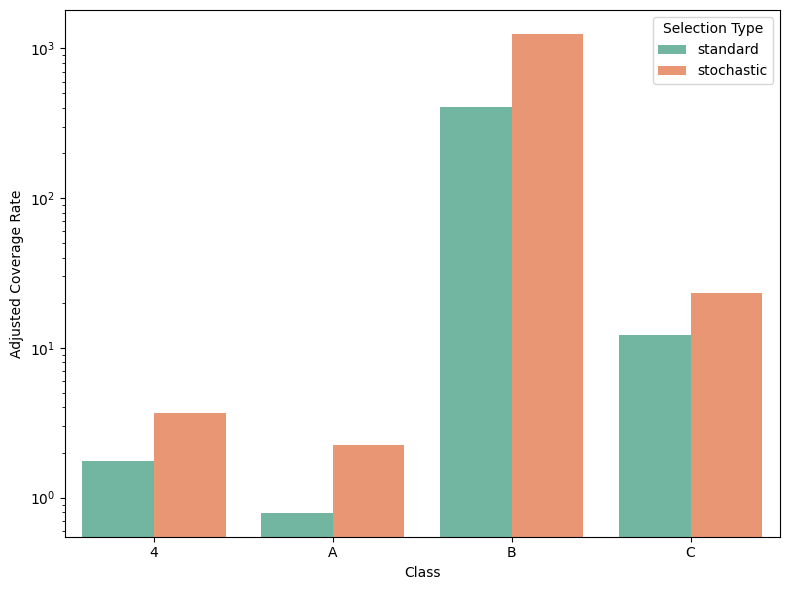

In [10]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=avg_cr_adjusted,
    x='file_class',
    y='adjusted_coverage_rate',
    hue='selection_type',
    palette='Set2'
)

plt.yscale('log')

# plt.title("Adjusted Average Coverage Rate per Class (Incorporating Execution Time)")

plt.xlabel("Class")
plt.ylabel("Adjusted Coverage Rate")
plt.legend(title="Selection Type")
plt.tight_layout()
plt.savefig("parameter:selection_type_adjusted_cr.png")
plt.show()

Interpretation:
- The stochastic method is more efficient than the standard method.

### Best coverage rate

In [11]:
best_cr = df.loc[df.groupby(['file_class', 'selection_type'])['coverage_rate'].idxmax()]

best_cr

,filename,m,n,k,initial_fitness,fitness,iteration,execution_time(s),num_particles,neighborhood_size,inertia_type,inertia_value,c1,c2,dist_type,selection_type,coverage_rate,file_class
12629,scp41.txt,1000,200,50,140,162,300,28.178039,100,30.0,linear,None,1.5,1.5,wHD,standard,81.0,4
53011,scp46.txt,1000,200,50,144,162,700,40.025176,100,30.0,fixed,0.2,1.5,2.0,HD,stochastic,81.0,4
76190,scpa1.txt,3000,300,150,297,300,100,3.856736,30,global,fixed,0.7,2.0,1.5,HD,standard,100.0,A
76183,scpa1.txt,3000,300,150,292,300,700,48.982827,30,10.0,fixed,0.5,2.0,2.0,wHD,stochastic,100.0,A
76303,scpb1.txt,3000,300,150,300,300,100,0.032514,10,global,fixed,0.2,1.5,1.5,HD,standard,100.0,B
76308,scpb1.txt,3000,300,150,300,300,100,0.009398,10,global,fixed,0.2,1.5,1.5,HD,stochastic,100.0,B
121,scpc2.txt,4000,400,200,397,400,100,6.327383,10,global,linear,None,1.5,2.0,wHD,standard,100.0,C
54985,scpc2.txt,4000,400,200,397,400,100,1.970820,10,global,linear,None,2.0,2.0,HD,stochastic,100.0,C


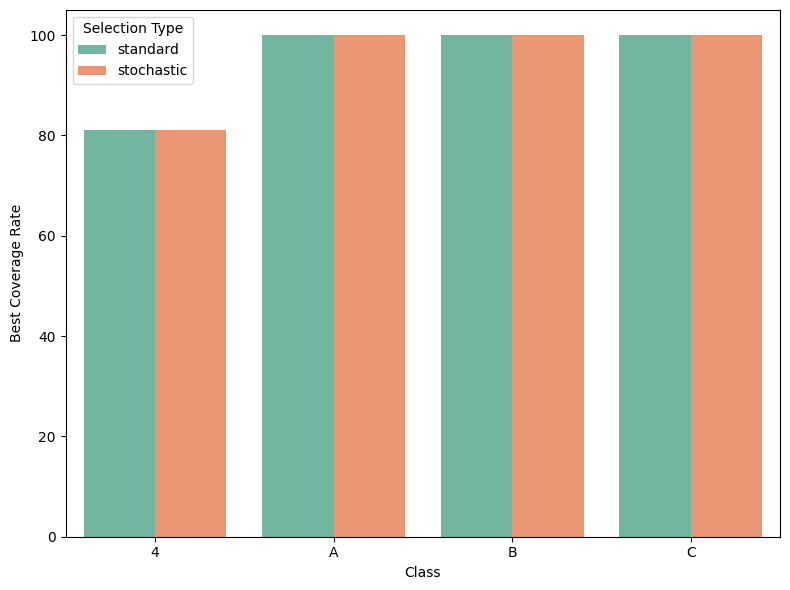

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=best_cr,
    x='file_class',
    y='coverage_rate',
    hue='selection_type',
    palette='Set2'
)

# plt.title("Best Coverage Rate per Class")
plt.xlabel("Class")
plt.ylabel("Best Coverage Rate")
plt.legend(title="Selection Type")
plt.tight_layout()
plt.show()

## Selecting dist_type

### Average coverage rate

In [13]:
avg_cr = df.groupby(['file_class', 'dist_type'])['coverage_rate'].mean().reset_index()

avg_cr

,file_class,dist_type,coverage_rate
0,4,HD,75.453304
1,4,bit-wise,75.429196
2,4,wHD,75.443333
3,A,HD,99.203245
4,A,bit-wise,99.215560
5,A,wHD,99.207079
6,B,HD,100.000000
7,B,bit-wise,100.000000
8,B,wHD,100.000000
9,C,HD,99.985634


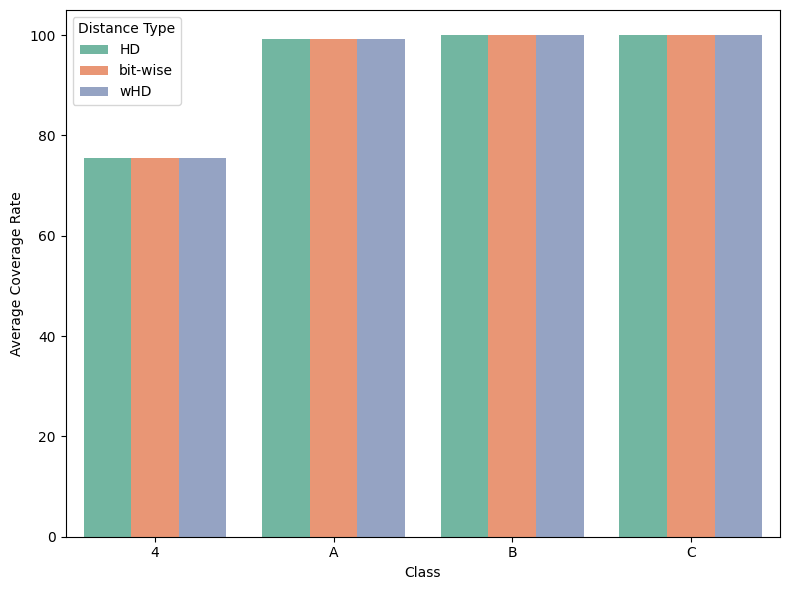

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=avg_cr,
    x='file_class',
    y='coverage_rate',
    hue='dist_type',
    palette='Set2'
)

# plt.title("Average Coverage Rate per Class")
plt.xlabel("Class")
plt.ylabel("Average Coverage Rate")
plt.legend(title="Distance Type")
plt.tight_layout()
plt.savefig("parameter:dist_type_avg_cr.png")
plt.show()

### Incorporating time to the average coverage rate

In [15]:
avg_cr_adjusted = df.groupby(['file_class', 'dist_type']).apply(
    lambda group: group['coverage_rate'].mean() / group['execution_time(s)'].mean()
).reset_index(name='adjusted_coverage_rate')

avg_cr_adjusted

<ipython-input-15-68e6cb82ce6a>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_cr_adjusted = df.groupby(['file_class', 'dist_type']).apply(


,file_class,dist_type,adjusted_coverage_rate
0,4,HD,2.708230
1,4,bit-wise,2.749832
2,4,wHD,1.886711
3,A,HD,1.372996
4,A,bit-wise,1.385889
5,A,wHD,0.895643
6,B,HD,689.326369
7,B,bit-wise,695.284938
8,B,wHD,494.991049
9,C,HD,16.666124


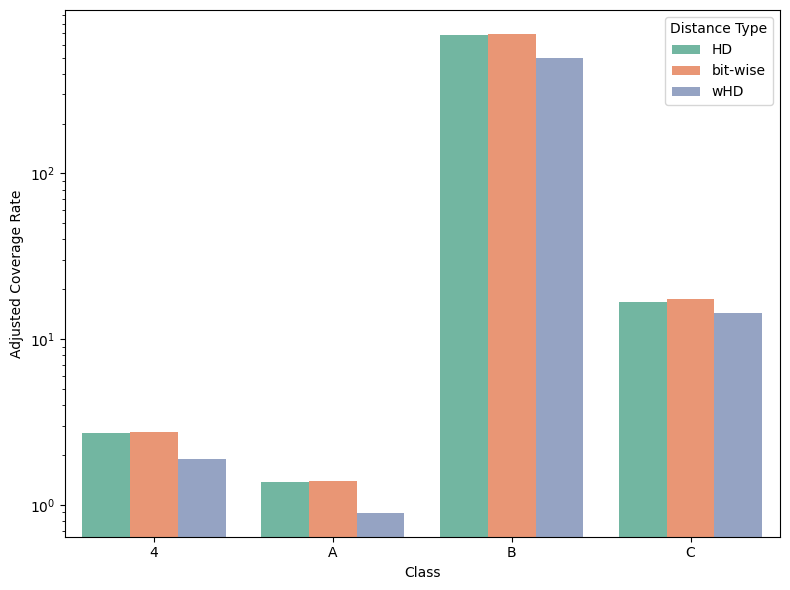

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=avg_cr_adjusted,
    x='file_class',
    y='adjusted_coverage_rate',
    hue='dist_type',
    palette='Set2'
)

plt.yscale('log')

# plt.title("Adjusted Average Coverage Rate per Class (Incorporating Execution Time)")

plt.xlabel("Class")
plt.ylabel("Adjusted Coverage Rate")
plt.legend(title="Distance Type")
plt.tight_layout()
plt.savefig("parameter:dist_type_adjusted_cr.png")
plt.show()

Interpretation:
- wHD takes a lot of time compared to the coverage rate it outputs.
- bit-wise and HD are almost identical, with bit-wise slightly surpassing HD.

### Best coverage rate

In [17]:
best_cr = df.loc[df.groupby(['file_class', 'dist_type'])['coverage_rate'].idxmax()]

best_cr.head()

,filename,m,n,k,initial_fitness,fitness,iteration,execution_time(s),num_particles,neighborhood_size,inertia_type,inertia_value,c1,c2,dist_type,selection_type,coverage_rate,file_class
53011,scp46.txt,1000,200,50,144,162,700,40.025176,100,30.0,fixed,0.2,1.5,2.0,HD,stochastic,81.0,4
23784,scp48.txt,1000,200,50,140,162,300,16.685771,30,10.0,linear,None,2.0,2.0,bit-wise,standard,81.0,4
12629,scp41.txt,1000,200,50,140,162,300,28.178039,100,30.0,linear,None,1.5,1.5,wHD,standard,81.0,4
76190,scpa1.txt,3000,300,150,297,300,100,3.856736,30,global,fixed,0.7,2.0,1.5,HD,standard,100.0,A
76185,scpa1.txt,3000,300,150,294,300,300,10.295560,30,10.0,fixed,0.7,1.5,1.5,bit-wise,stochastic,100.0,A


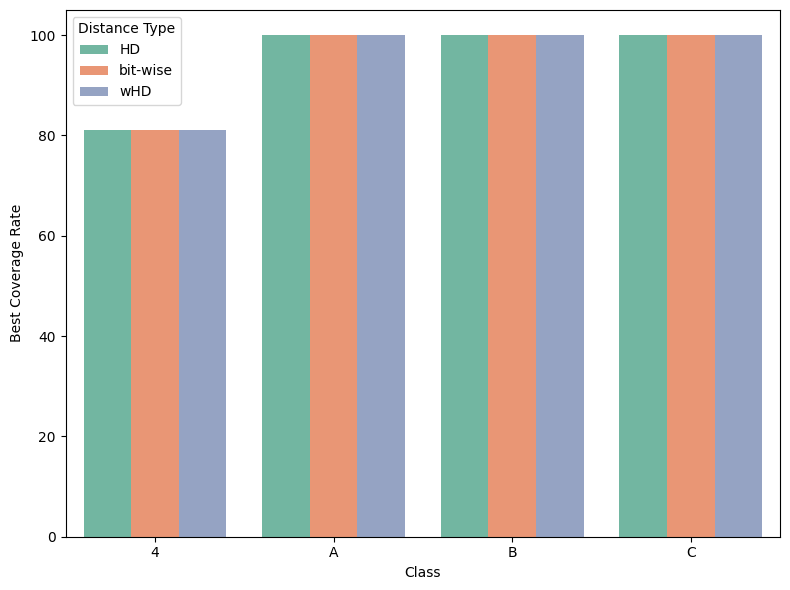

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=best_cr,
    x='file_class',
    y='coverage_rate',
    hue='dist_type',
    palette='Set2'
)

# plt.title("Best Coverage Rate per Class")
plt.xlabel("Class")
plt.ylabel("Best Coverage Rate")
plt.legend(title="Distance Type")
plt.tight_layout()
plt.show()

In [19]:
best_dist_type, best_selection_type = 'bit-wise', 'stochastic'

# Hyperparameter selection

## Preparing the data

We can tune the hyper-parameters on all the data, but it makes more sense to do it with the best PSO parameters.

In [20]:
df = df[df['dist_type'] == best_dist_type]

df.shape

(34843, 18)

In [21]:
df = df[df['selection_type'] == best_selection_type]

df.shape

(17417, 18)

## Selecting number of particles

### Using average coverage score

<ipython-input-22-5207204a6b61>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


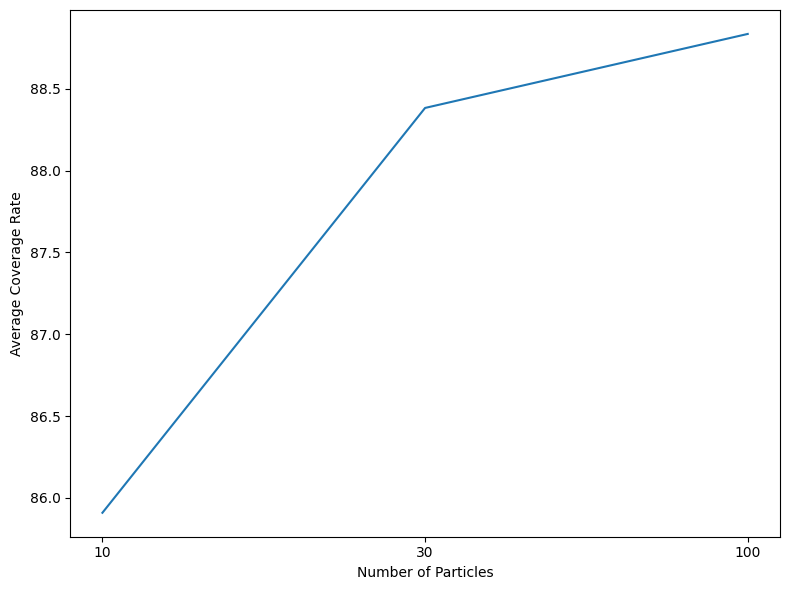

In [22]:
avg_cr = df.groupby(['num_particles'])['coverage_rate'].mean().reset_index()

avg_cr

# This is done in order to get relevant values only on the x axis
avg_cr['num_particles'] = avg_cr['num_particles'].astype(str)
plt.figure(figsize=(8, 6))
sns.lineplot(
    data=avg_cr,
    x='num_particles',
    y='coverage_rate',
    # hue='num_particles',
    palette='Set2'
)

# plt.title("Best Coverage Rate per Class")
plt.xlabel("Number of Particles")
plt.ylabel("Average Coverage Rate")
# plt.legend(title="Number of Particles")
plt.tight_layout()
plt.savefig("hyperparameter:num_particles_avg_cr.png")
plt.show()

## Selecting neighborhood size

In [23]:
avg_cr = df.groupby(['neighborhood_size'])['coverage_rate'].mean().reset_index()

avg_cr

,neighborhood_size,coverage_rate
0,10.0,88.618204
1,30.0,88.863175
2,global,87.351728


<ipython-input-24-37ab1661cd24>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


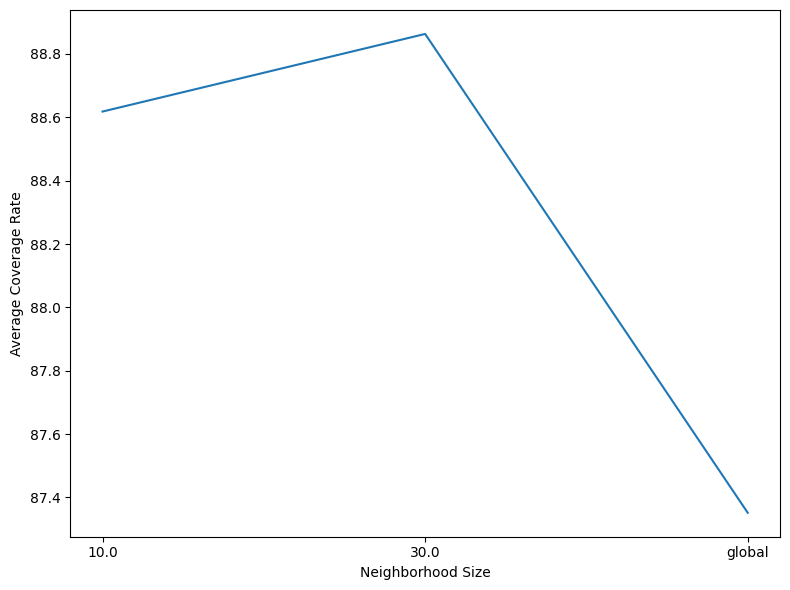

In [24]:
avg_cr['neighborhood_size'] = avg_cr['neighborhood_size'].astype(str)

plt.figure(figsize=(8, 6))
sns.lineplot(
    data=avg_cr,
    x='neighborhood_size',
    y='coverage_rate',
    # hue='neighborhood_size',
    palette='Set2'
)

# plt.title("Best Coverage Rate per Class")
plt.xlabel("Neighborhood Size")
plt.ylabel("Average Coverage Rate")
# plt.legend(title="Neighborhood Size")
plt.tight_layout()
plt.savefig("hyperparameter:neighborhood_size_avg_cr.png")
plt.show()

## Selecting best number of particles, neighborhood size combination

In [25]:
avg_cr = df.groupby([ 'num_particles', 'neighborhood_size'])['coverage_rate'].mean().reset_index()

avg_cr

,num_particles,neighborhood_size,coverage_rate
0,10,global,85.908654
1,30,10.0,88.396282
2,30,global,88.371116
3,100,10.0,88.840725
4,100,30.0,88.863175
5,100,global,88.804376


<ipython-input-26-a0824734447e>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


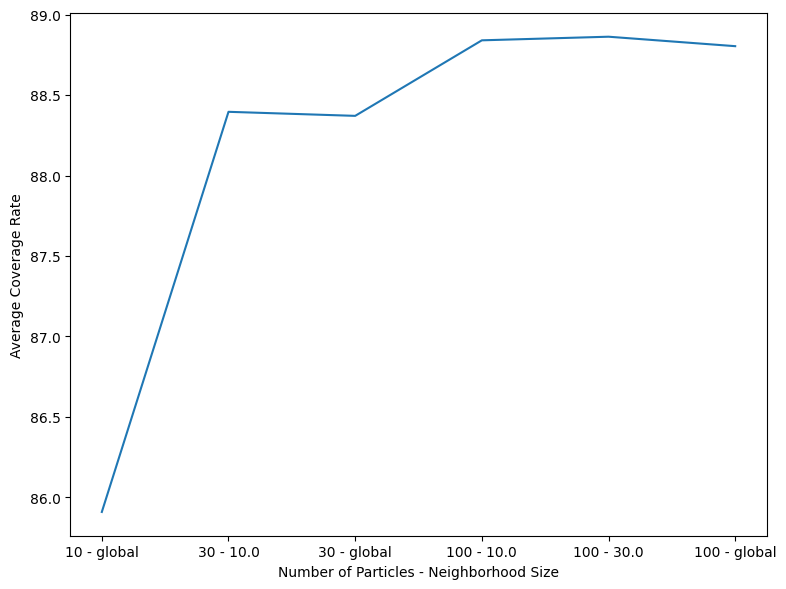

In [26]:
# Combine 'num_particles' and 'neighborhood_size' into a single column
avg_cr['particles_and_neighborhood'] = avg_cr['num_particles'].astype(str) + " - " + avg_cr['neighborhood_size'].astype(str)

plt.figure(figsize=(8, 6))
sns.lineplot(
    data=avg_cr,
    x='particles_and_neighborhood',
    y='coverage_rate',
    # hue='particles_and_neighborhood',
    palette='Set2'
)

plt.xlabel("Number of Particles - Neighborhood Size")
plt.ylabel("Average Coverage Rate")
# plt.legend(title="Number of Particles - Neighborhood Size")
plt.tight_layout()
plt.savefig("hyperparameter:particles_and_neighborhood_avg_cr.png")
plt.show()

## Selecting number of iterations

<ipython-input-27-40e05cd03c04>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


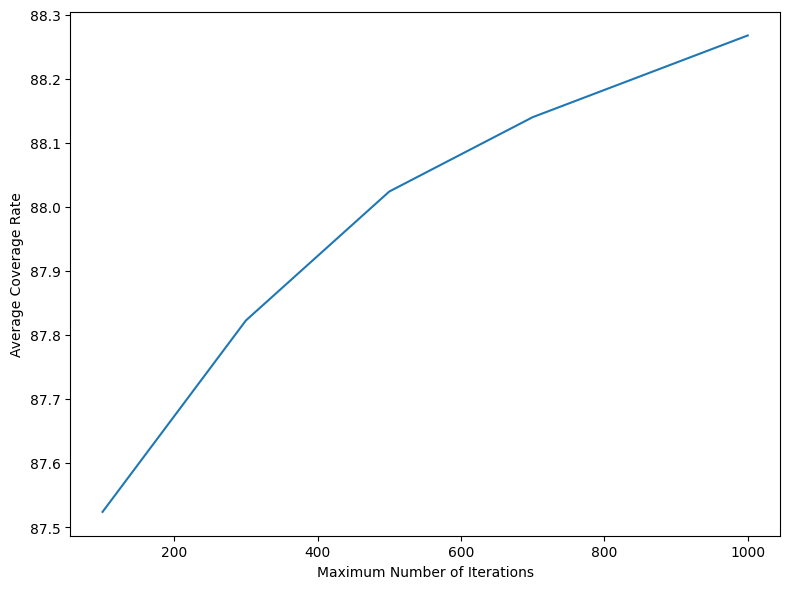

In [27]:
avg_cr = df.groupby(['iteration'])['coverage_rate'].mean().reset_index()

avg_cr


plt.figure(figsize=(8, 6))
sns.lineplot(
    data=avg_cr,
    x='iteration',
    y='coverage_rate',
    # hue='particles_and_neighborhood',
    palette='Set2'
)

plt.xlabel("Maximum Number of Iterations")
plt.ylabel("Average Coverage Rate")
# plt.legend(title="Number of Particles - Neighborhood Size")
plt.tight_layout()
plt.savefig("hyperparameter:iterations_avg_cr.png")
plt.show()

## Selecting inertia type

<ipython-input-28-bdf65b51b4df>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


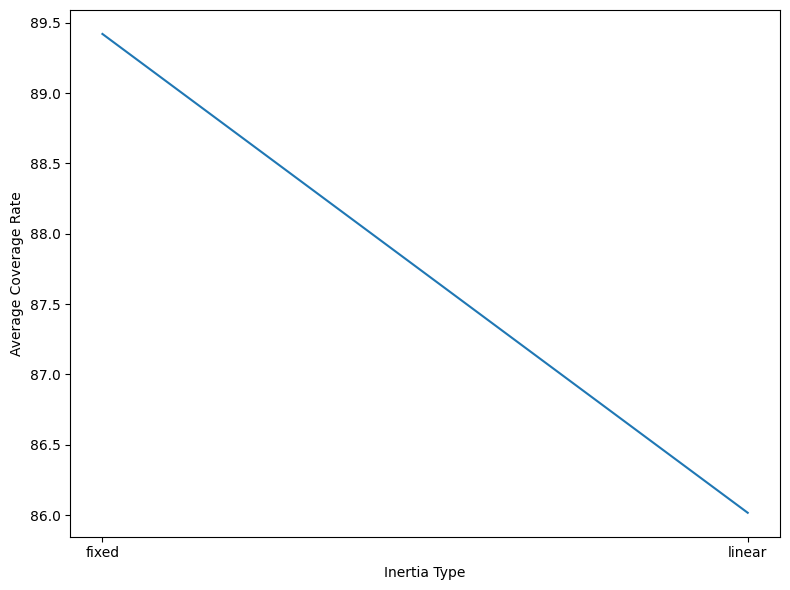

In [28]:
avg_cr = df.groupby(['inertia_type'])['coverage_rate'].mean().reset_index()

avg_cr


plt.figure(figsize=(8, 6))
sns.lineplot(
    data=avg_cr,
    x='inertia_type',
    y='coverage_rate',
    # hue='particles_and_neighborhood',
    palette='Set2'
)

plt.xlabel("Inertia Type")
plt.ylabel("Average Coverage Rate")
# plt.legend(title="Number of Particles - Neighborhood Size")
plt.tight_layout()
plt.savefig("hyperparameter:inertia_type_avg_cr.png")
plt.show()

## Selecting inertia value 

Only if the best inertia type is fixed

<ipython-input-29-0b4607fd8ae2>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


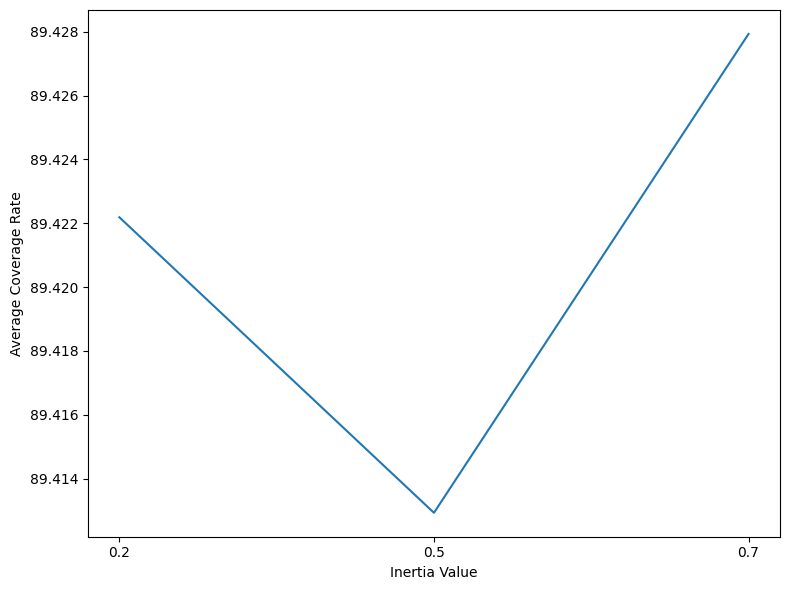

In [29]:
avg_cr = df[df['inertia_type']=='fixed'].groupby(['inertia_value'])['coverage_rate'].mean().reset_index()

avg_cr['inertia_value'] = avg_cr['inertia_value'].astype(str)


plt.figure(figsize=(8, 6))
sns.lineplot(
    data=avg_cr,
    x='inertia_value',
    y='coverage_rate',
    # hue='particles_and_neighborhood',
    palette='Set2'
)

plt.xlabel("Inertia Value")
plt.ylabel("Average Coverage Rate")
# plt.legend(title="Number of Particles - Neighborhood Size")
plt.tight_layout()
plt.savefig("hyperparameter:inertia_value_avg_cr.png")
plt.show()

## Selecting best c1, c2 combination

<ipython-input-30-fa8dad5eceb9>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


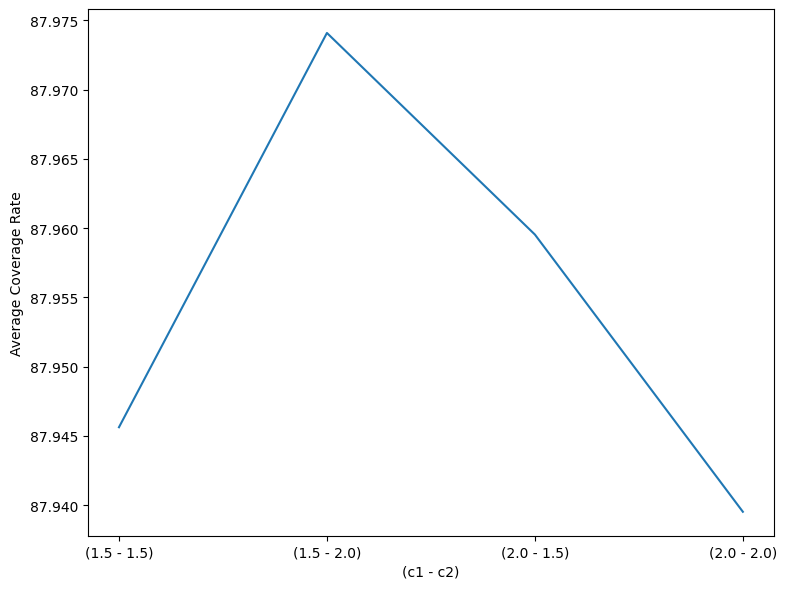

In [30]:
avg_cr = df.groupby(['c1', 'c2'])['coverage_rate'].mean().reset_index()

avg_cr

avg_cr['c1_c2'] = "(" + avg_cr['c1'].astype(str) + " - " + avg_cr['c2'].astype(str) + ")"

plt.figure(figsize=(8, 6))
sns.lineplot(
    data=avg_cr,
    x='c1_c2',
    y='coverage_rate',
    # hue='particles_and_neighborhood',
    palette='Set2'
)

plt.xlabel("(c1 - c2)")
plt.ylabel("Average Coverage Rate")
# plt.legend(title="Number of Particles - Neighborhood Size")
plt.tight_layout()
plt.savefig("hyperparameter:c1_c2_avg_cr.png")
plt.show()

The best hyperparameters:

'num_particles': 100

'neighborhood_size': 30

'inertia_type': 'fixed'

'inertia_value': 0.7

(c1, c2): (1.5, 2.0)


# Best parameters on different problem classes

In [31]:
best_df = df[
    (df['num_particles'] == 100) &
    (df['neighborhood_size'] == 30) &
    (df['inertia_type'] == 'fixed') &
    (df['inertia_value'] == 0.7) &
    (df['c1'] == 1.5) &
    (df['c2'] == 2.0)
].copy()




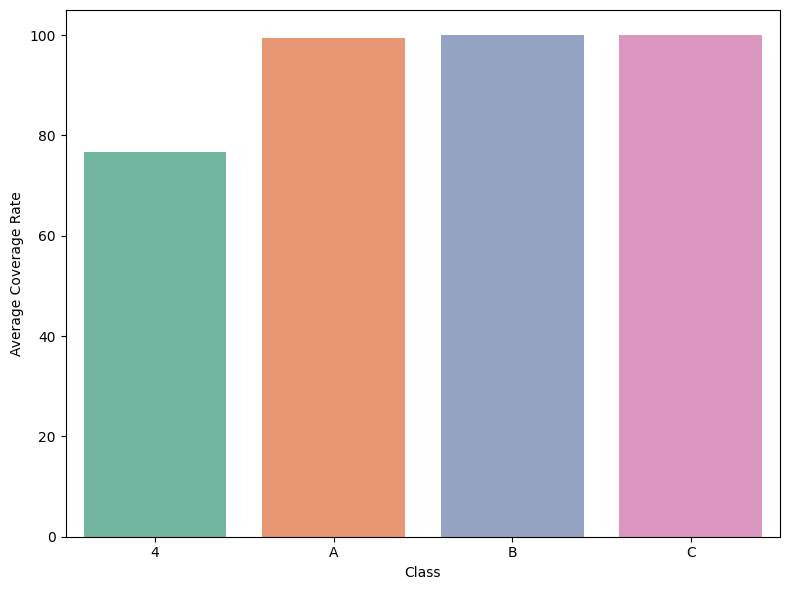

In [52]:
avg_best = best_df.groupby(['file_class'])['coverage_rate'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(
    data=avg_best,
    x='file_class',
    y='coverage_rate',
    # hue='mutate',
    palette='Set2'
)

plt.xlabel("Class")
plt.ylabel("Average Coverage Rate")
# plt.legend(title="Mutate")
plt.tight_layout()
plt.savefig("best_avg.png")
plt.show()

In [57]:
global_avg_cr = best_df['coverage_rate'].mean()
print(global_avg_cr)

90.588


# Effect of mutation

### Preparing the data


In [33]:
best_df['mutate'] = 'False'

best_df

,filename,m,n,k,initial_fitness,fitness,iteration,execution_time(s),num_particles,neighborhood_size,inertia_type,inertia_value,c1,c2,dist_type,selection_type,coverage_rate,file_class,mutate
39699,scpa5.txt,3000,300,150,294,298,100,14.214107,100,30.0,fixed,0.7,1.5,2.0,bit-wise,stochastic,99.333333,A,False
39700,scpa5.txt,3000,300,150,294,298,300,42.338597,100,30.0,fixed,0.7,1.5,2.0,bit-wise,stochastic,99.333333,A,False
39701,scpa5.txt,3000,300,150,294,298,500,71.562438,100,30.0,fixed,0.7,1.5,2.0,bit-wise,stochastic,99.333333,A,False
39702,scpa5.txt,3000,300,150,294,298,700,102.809146,100,30.0,fixed,0.7,1.5,2.0,bit-wise,stochastic,99.333333,A,False
39703,scpa5.txt,3000,300,150,294,298,1000,151.328396,100,30.0,fixed,0.7,1.5,2.0,bit-wise,stochastic,99.333333,A,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103848,scpc5.txt,4000,400,200,399,400,100,0.376808,100,30.0,fixed,0.7,1.5,2.0,bit-wise,stochastic,100.000000,C,False
103849,scpc5.txt,4000,400,200,399,400,300,0.376808,100,30.0,fixed,0.7,1.5,2.0,bit-wise,stochastic,100.000000,C,False
103850,scpc5.txt,4000,400,200,399,400,500,0.376808,100,30.0,fixed,0.7,1.5,2.0,bit-wise,stochastic,100.000000,C,False
103851,scpc5.txt,4000,400,200,399,400,700,0.376808,100,30.0,fixed,0.7,1.5,2.0,bit-wise,stochastic,100.000000,C,False


Adding the results with mutation

In [34]:
df_mutate = pd.read_csv('/kaggle/input/stochastic/mutation.csv') 

# Preprocesing df_mutate:
df_mutate["coverage_rate"] = df_mutate["fitness"] / df_mutate["n"] * 100
df_mutate['file_class'] = df_mutate['filename'].apply(classify_filename)


#Combinig dfs
df_mutate = pd.concat([best_df, df_mutate], ignore_index=True)

df_mutate


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,filename,m,n,k,initial_fitness,fitness,iteration,execution_time(s),num_particles,neighborhood_size,inertia_type,inertia_value,c1,c2,dist_type,selection_type,coverage_rate,file_class,mutate,mutation_rate
0,scpa5.txt,3000,300,150,294,298,100,14.214107,100,30.0,fixed,0.7,1.5,2.0,bit-wise,stochastic,99.333333,A,False,NaN
1,scpa5.txt,3000,300,150,294,298,300,42.338597,100,30.0,fixed,0.7,1.5,2.0,bit-wise,stochastic,99.333333,A,False,NaN
2,scpa5.txt,3000,300,150,294,298,500,71.562438,100,30.0,fixed,0.7,1.5,2.0,bit-wise,stochastic,99.333333,A,False,NaN
3,scpa5.txt,3000,300,150,294,298,700,102.809146,100,30.0,fixed,0.7,1.5,2.0,bit-wise,stochastic,99.333333,A,False,NaN
4,scpa5.txt,3000,300,150,294,298,1000,151.328396,100,30.0,fixed,0.7,1.5,2.0,bit-wise,stochastic,99.333333,A,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,scpa1.txt,3000,300,150,294,297,100,8.206901,100,30,fixed,0.5,1.5,2.0,bit-wise,stochastic,99.000000,A,True,0.8
456,scpa1.txt,3000,300,150,294,298,300,24.695424,100,30,fixed,0.5,1.5,2.0,bit-wise,stochastic,99.333333,A,True,0.8
457,scpa1.txt,3000,300,150,294,298,500,41.141137,100,30,fixed,0.5,1.5,2.0,bit-wise,stochastic,99.333333,A,True,0.8
458,scpa1.txt,3000,300,150,294,298,700,57.653092,100,30,fixed,0.5,1.5,2.0,bit-wise,stochastic,99.333333,A,True,0.8


### Best coverage rate with and without mutation

In [35]:
best_cr = df_mutate.loc[df_mutate.groupby(['mutate', 'file_class'])['coverage_rate'].idxmax()]
best_cr

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,filename,m,n,k,initial_fitness,fitness,iteration,execution_time(s),num_particles,neighborhood_size,inertia_type,inertia_value,c1,c2,dist_type,selection_type,coverage_rate,file_class,mutate,mutation_rate
164,scp42.txt,1000,200,50,144,158,1000,61.339673,100,30,fixed,0.5,1.5,2.0,bit-wise,stochastic,79.000000,4,True,0.8
387,scpa4.txt,3000,300,150,296,300,316,40.452368,100,30,fixed,0.5,1.5,2.0,bit-wise,stochastic,100.000000,A,True,0.1
345,scpb5.txt,3000,300,150,300,300,1,0.127187,100,30,fixed,0.5,1.5,2.0,bit-wise,stochastic,100.000000,B,True,0.1
325,scpc5.txt,4000,400,200,398,400,22,2.848899,100,30,fixed,0.5,1.5,2.0,bit-wise,stochastic,100.000000,C,True,0.1
40,scp46.txt,1000,200,50,145,157,100,5.911398,100,30.0,fixed,0.7,1.5,2.0,bit-wise,stochastic,78.500000,4,False,NaN
7,scpa4.txt,3000,300,150,296,299,500,74.122830,100,30.0,fixed,0.7,1.5,2.0,bit-wise,stochastic,99.666667,A,False,NaN
75,scpb1.txt,3000,300,150,300,300,100,0.120554,100,30.0,fixed,0.7,1.5,2.0,bit-wise,stochastic,100.000000,B,False,NaN
100,scpc1.txt,4000,400,200,398,400,100,6.851423,100,30.0,fixed,0.7,1.5,2.0,bit-wise,stochastic,100.000000,C,False,NaN


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

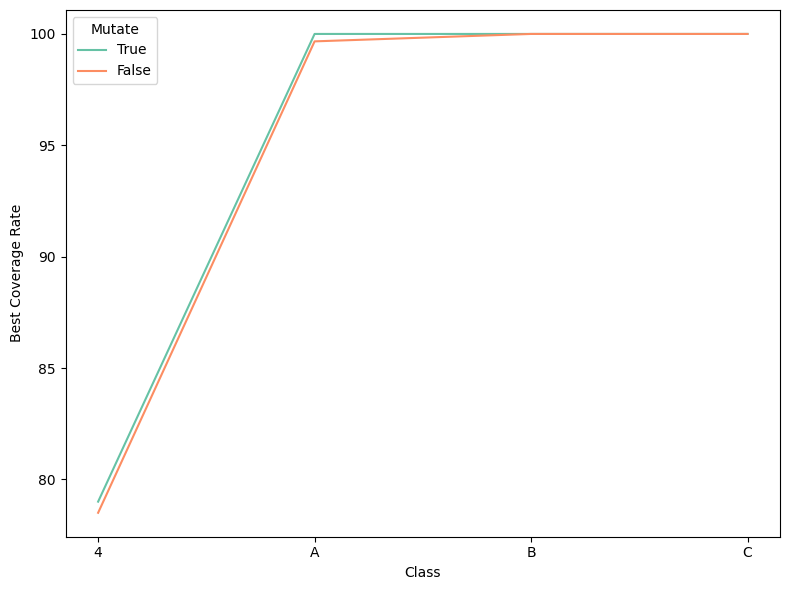

In [36]:
plt.figure(figsize=(8, 6))
sns.lineplot(
    data=best_cr,
    x='file_class',
    y='coverage_rate',
    hue='mutate',
    palette='Set2'
)

plt.xlabel("Class")
plt.ylabel("Best Coverage Rate")
plt.legend(title="Mutate")
plt.tight_layout()
plt.savefig("mutation_avg_cr.png")
plt.show()

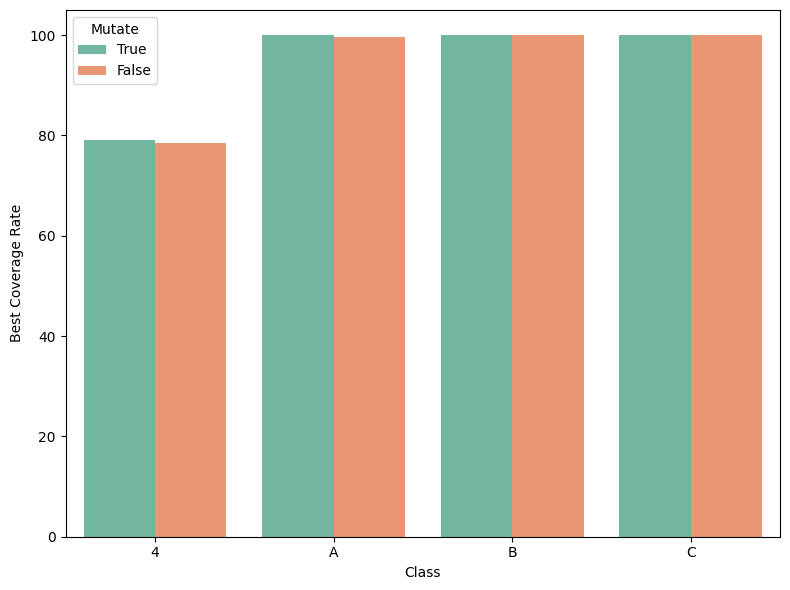

In [37]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=best_cr,
    x='file_class',
    y='coverage_rate',
    hue='mutate',
    palette='Set2'
)

plt.xlabel("Class")
plt.ylabel("Best Coverage Rate")
plt.legend(title="Mutate")
plt.tight_layout()
plt.show()

### Best mutation rate

In [38]:
avg_cr_mutate = df_mutate[df_mutate['mutate'] == True].groupby(['mutation_rate'])['coverage_rate'].mean().reset_index()
avg_cr_mutate

,mutation_rate,coverage_rate
0,0.1,85.483936
1,0.2,85.369919
2,0.4,85.629412
3,0.8,85.900000


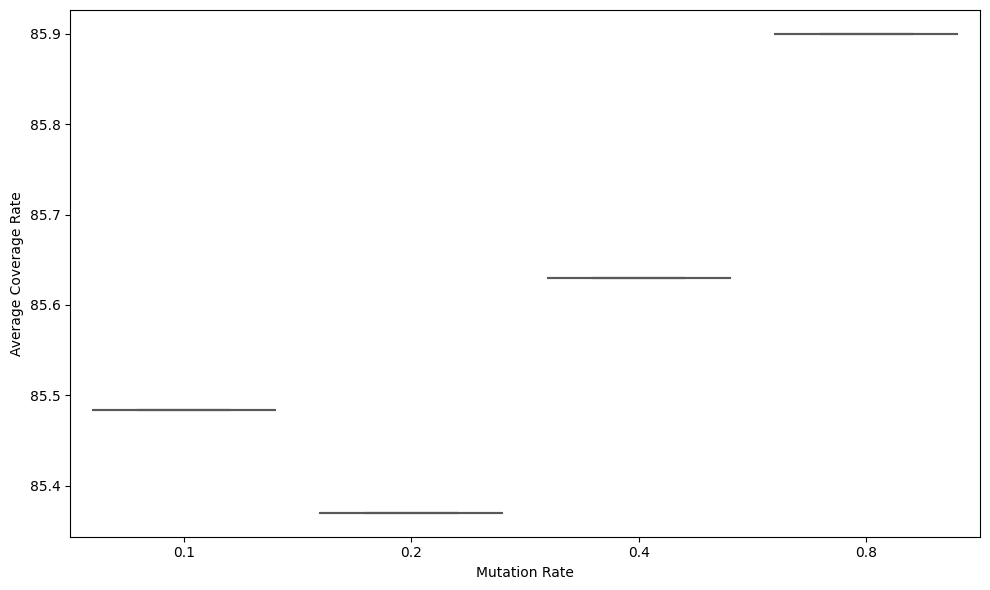

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=avg_cr_mutate,
    x='mutation_rate',
    y='coverage_rate',
    # hue='mutation_rate',
    palette='Set2'
)

# plt.title("Coverage Rate by Mutation Setting and Mutation Rate")
plt.xlabel("Mutation Rate")
plt.ylabel("Average Coverage Rate")
# plt.legend(title="Mutation Rate")
plt.tight_layout()
plt.savefig("mutation_rate_avg_cr.png")
plt.show()

# Preparing PSO best param results 

# Comparison with DFS

In [40]:
df_pso = pd.read_csv("/kaggle/input/stochastic/pso_results.csv")
df_pso["coverage_rate"] = df_pso["fitness"] / df_pso["n"] * 100
df_pso["penalized_coverage_rate"] = df_pso["coverage_rate"] 
df_pso['file_class'] = df_pso['filename'].apply(classify_filename)
df_pso.drop(columns=['num_particles', 'neighborhood_size', 'inertia_type', 'inertia_value', 'c1', 'c2', 'mutate', 'mutation_rate', 'dist_type', 'selection_type'], inplace=True)
df_pso

,filename,m,n,k,fitness,execution_time(s),coverage_rate,penalized_coverage_rate,file_class
0,scpc5.txt,4000,400,200,400,0.283618,100.000000,100.000000,C
1,scpc4.txt,4000,400,200,400,0.289925,100.000000,100.000000,C
2,scpc3.txt,4000,400,200,400,1.042090,100.000000,100.000000,C
3,scpc2.txt,4000,400,200,400,0.112339,100.000000,100.000000,C
4,scpc1.txt,4000,400,200,400,1.691475,100.000000,100.000000,C
5,scpb5.txt,3000,300,150,300,0.084817,100.000000,100.000000,B
6,scpb4.txt,3000,300,150,300,0.084877,100.000000,100.000000,B
7,scpb3.txt,3000,300,150,300,0.097992,100.000000,100.000000,B
8,scpb2.txt,3000,300,150,300,0.081153,100.000000,100.000000,B
9,scpb1.txt,3000,300,150,300,0.083036,100.000000,100.000000,B


## Reading and preprocessing data

In [41]:
df_dfs = pd.read_csv("/kaggle/input/stochastic/dfs_1h.csv")
df_dfs["coverage_rate"] = df_dfs["fitness"] / df_dfs["n"] * 100
df_dfs["penalized_coverage_rate"] = df_dfs["coverage_rate"] * df_dfs["used_budget"] / df_dfs["k"]
df_dfs['file_class'] = df_dfs['filename'].apply(classify_filename)
df_dfs

,filename,m,n,k,fitness,used_budget,completed,valid,execution_time(s),coverage_rate,penalized_coverage_rate,file_class
0,scp41.txt,1000,200,50,86,28,False,False,3600.003185,43.000000,24.080000,4
1,scp410.txt,1000,200,50,94,28,False,False,3600.003188,47.000000,26.320000,4
2,scp42.txt,1000,200,50,98,28,False,False,3600.003059,49.000000,27.440000,4
3,scp43.txt,1000,200,50,77,26,False,False,3600.003186,38.500000,20.020000,4
4,scp44.txt,1000,200,50,82,26,False,False,3600.003074,41.000000,21.320000,4
5,scp45.txt,1000,200,50,99,29,False,False,3600.003150,49.500000,28.710000,4
6,scp46.txt,1000,200,50,86,25,False,False,3600.003040,43.000000,21.500000,4
7,scp47.txt,1000,200,50,80,25,False,False,3600.003159,40.000000,20.000000,4
8,scp48.txt,1000,200,50,79,26,False,False,3600.003181,39.500000,20.540000,4
9,scp49.txt,1000,200,50,89,26,False,False,3600.003175,44.500000,23.140000,4


## Execution time comparison

In [42]:
exec_pso = df_pso.groupby(df_pso['file_class'])['execution_time(s)'].mean().reset_index()
exec_pso['algorithm'] = 'PSO'
exec_dfs = df_dfs.groupby(df_dfs['file_class'])['execution_time(s)'].mean().reset_index()
exec_dfs['algorithm'] = 'DFS'
exec_pso_dfs = pd.concat([exec_pso, exec_dfs])

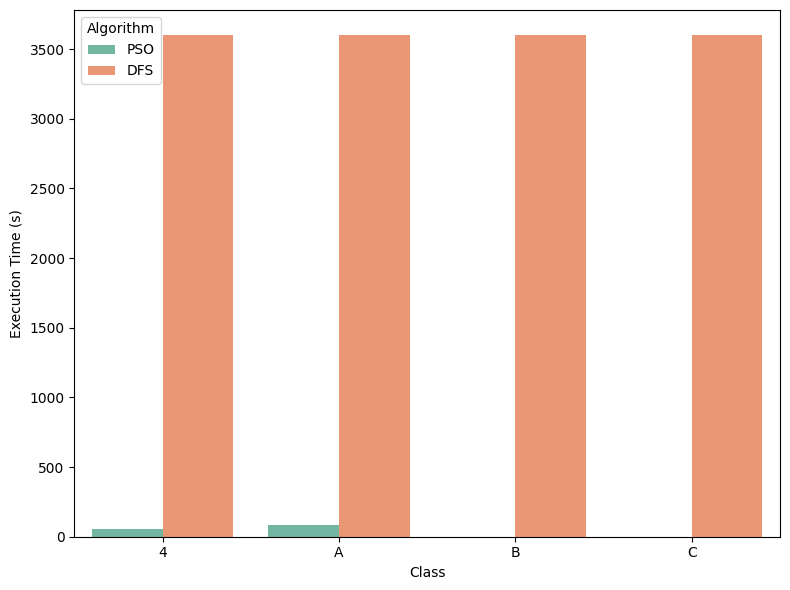

In [43]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=exec_pso_dfs,
    x='file_class',
    y='execution_time(s)',
    hue='algorithm',
    palette='Set2'
)

# plt.yscale('log')

# plt.title("Adjusted Average Coverage Rate per Class (Incorporating Execution Time)")

plt.xlabel("Class")
plt.ylabel("Execution Time (s)")
plt.legend(title="Algorithm")
plt.savefig("exec_time_dfs_pso_linear.png")
plt.tight_layout()
plt.show()

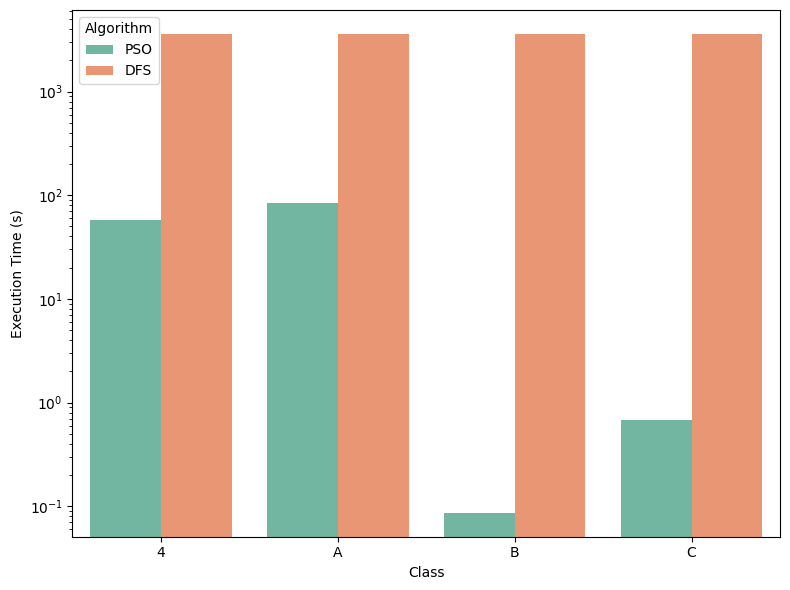

In [44]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=exec_pso_dfs,
    x='file_class',
    y='execution_time(s)',
    hue='algorithm',
    palette='Set2'
)

plt.yscale('log')

# plt.title("Adjusted Average Coverage Rate per Class (Incorporating Execution Time)")

plt.xlabel("Class")
plt.ylabel("Execution Time (s)")
plt.legend(title="Algorithm")
plt.savefig("exec_time_dfs_pso_log.png")
plt.tight_layout()
plt.show()

## Coverage Rate comparison

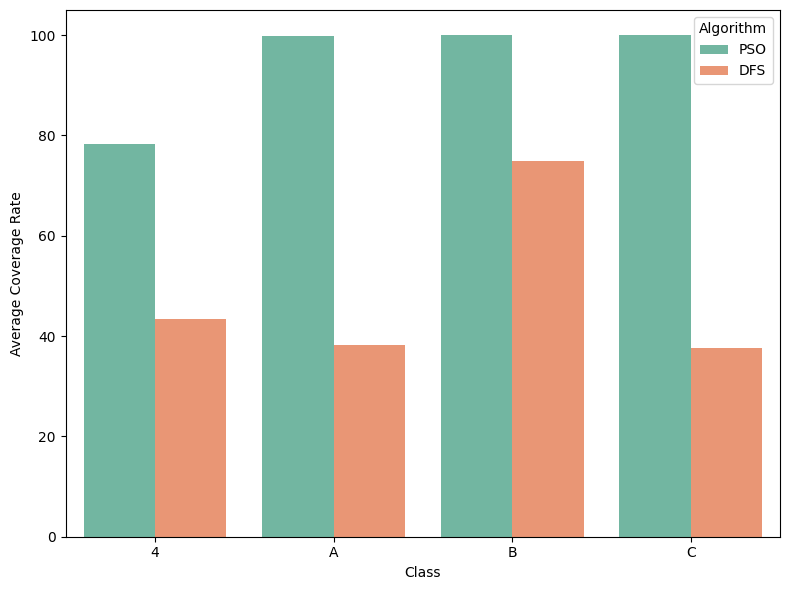

In [45]:
cr_pso = df_pso.groupby(df_pso['file_class'])['coverage_rate'].mean().reset_index()
cr_pso['algorithm'] = 'PSO'
cr_dfs = df_dfs.groupby(df_dfs['file_class'])['coverage_rate'].mean().reset_index()
cr_dfs['algorithm'] = 'DFS'
cr_pso_dfs = pd.concat([cr_pso, cr_dfs])

plt.figure(figsize=(8, 6))
sns.barplot(
    data=cr_pso_dfs,
    x='file_class',
    y='coverage_rate',
    hue='algorithm',
    palette='Set2'
)

# plt.yscale('log')

# plt.title("Adjusted Average Coverage Rate per Class (Incorporating Execution Time)")

plt.xlabel("Class")
plt.ylabel("Average Coverage Rate")
plt.legend(title="Algorithm")
plt.tight_layout()
plt.savefig("coverage_rate_dfs_pso.png")
plt.show()

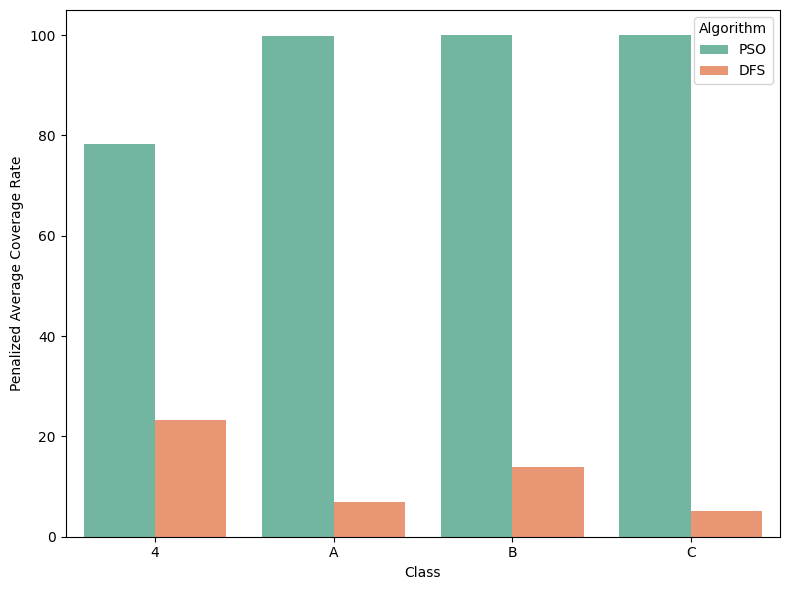

In [46]:
cr_pso = df_pso.groupby(df_pso['file_class'])['penalized_coverage_rate'].mean().reset_index()
cr_pso['algorithm'] = 'PSO'
cr_dfs = df_dfs.groupby(df_dfs['file_class'])['penalized_coverage_rate'].mean().reset_index()
cr_dfs['algorithm'] = 'DFS'
cr_pso_dfs = pd.concat([cr_pso, cr_dfs])

plt.figure(figsize=(8, 6))
sns.barplot(
    data=cr_pso_dfs,
    x='file_class',
    y='penalized_coverage_rate',
    hue='algorithm',
    palette='Set2'
)

# plt.yscale('log')

# plt.title("Adjusted Average Coverage Rate per Class (Incorporating Execution Time)")

plt.xlabel("Class")
plt.ylabel("Penalized Average Coverage Rate")
plt.legend(title="Algorithm")
plt.tight_layout()
plt.savefig("penalized_coverage_rate_dfs_pso.png")
plt.show()

# Comparison with greedy

## Reading and preprocessing data

In [47]:
df_greedy = pd.read_csv("/kaggle/input/stochastic/greedy.csv")
df_greedy["coverage_rate"] = df_greedy["fitness"] / df_greedy["n"] * 100
df_greedy['file_class'] = df_greedy['filename'].apply(classify_filename)
df_greedy

,filename,m,n,k,fitness,execution_time(s),coverage_rate,file_class
0,scpc5.txt,4000,400,200,400,0.003614,100.000000,C
1,scpc4.txt,4000,400,200,400,0.012623,100.000000,C
2,scpc3.txt,4000,400,200,400,0.005112,100.000000,C
3,scpc2.txt,4000,400,200,400,0.011503,100.000000,C
4,scpc1.txt,4000,400,200,400,0.016454,100.000000,C
5,scpb5.txt,3000,300,150,300,0.004830,100.000000,B
6,scpb4.txt,3000,300,150,300,0.005099,100.000000,B
7,scpb3.txt,3000,300,150,300,0.004944,100.000000,B
8,scpb2.txt,3000,300,150,300,0.004694,100.000000,B
9,scpb1.txt,3000,300,150,300,0.004755,100.000000,B


## Execution time comparison

In [48]:
exec_greedy = df_greedy.groupby(df_pso['file_class'])['execution_time(s)'].mean().reset_index()
exec_greedy['algorithm'] = 'Greedy'
exec_greedy_pso = pd.concat([exec_greedy, exec_pso])

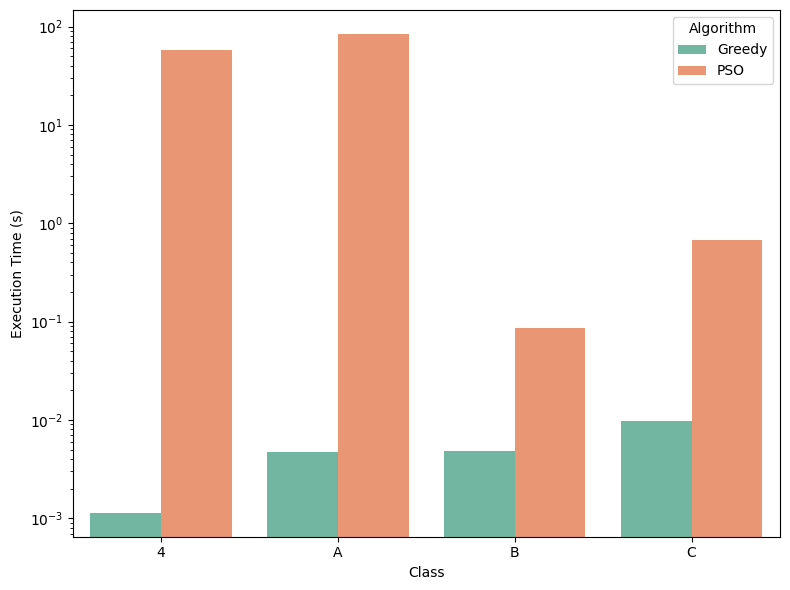

In [49]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=exec_greedy_pso,
    x='file_class',
    y='execution_time(s)',
    hue='algorithm',
    palette='Set2'
)

plt.yscale('log')

# plt.title("Adjusted Average Coverage Rate per Class (Incorporating Execution Time)")

plt.xlabel("Class")
plt.ylabel("Execution Time (s)")
plt.legend(title="Algorithm")
plt.savefig("exec_time_greedy_pso_log.png")
plt.tight_layout()
plt.show()

## Coverage rate comparison

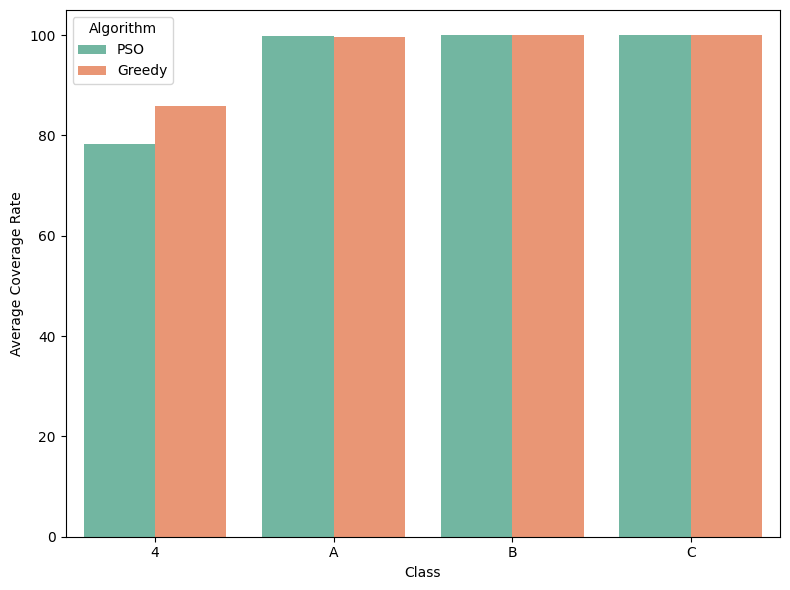

In [50]:
cr_pso = df_pso.groupby(df_pso['file_class'])['coverage_rate'].mean().reset_index()
cr_pso['algorithm'] = 'PSO'
cr_greedy = df_greedy.groupby(df_greedy['file_class'])['coverage_rate'].mean().reset_index()
cr_greedy['algorithm'] = 'Greedy'
cr_pso_greedy = pd.concat([cr_pso, cr_greedy])

plt.figure(figsize=(8, 6))
sns.barplot(
    data=cr_pso_greedy,
    x='file_class',
    y='coverage_rate',
    hue='algorithm',
    palette='Set2'
)

# plt.yscale('log')

# plt.title("Adjusted Average Coverage Rate per Class (Incorporating Execution Time)")

plt.xlabel("Class")
plt.ylabel("Average Coverage Rate")
plt.legend(title="Algorithm")
plt.tight_layout()
plt.savefig("coverage_rate_greedy_pso.png")
plt.show()